# Inverse Kinematics

Opposite of forward kinematics. Where the end effector is known and the goal is to calculate the joint angles of the manipulator. 

As seen before, the homogeneous transform between neighboring links is,

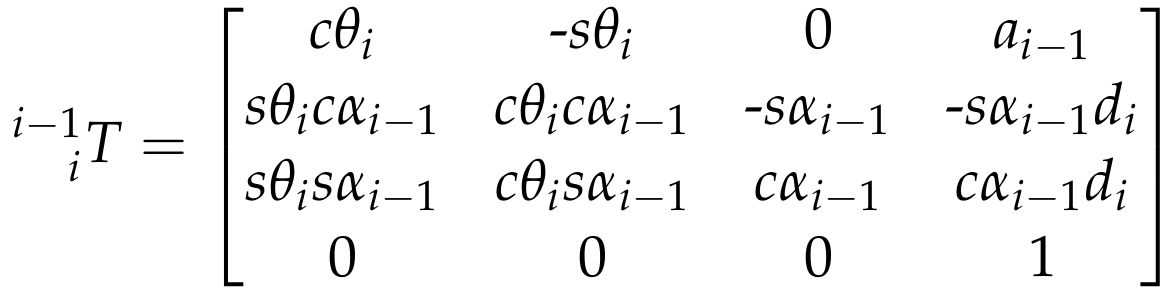

Thus, for a manipulator with n-joints the overall transformation between the base and end effector involves n-multiples of Equation (1). Clearly this can result in complicated, highly non-linear equations that, in general, **can have zero or multiple solutions**.

*Further, these mathematical solutions may in fact violate real-world joint limits*

---

### Consider the case of an "anthropomorphic" (RRR) manipulator. The name comes from the fact that 

* joint 1 is analogous to the human hip joint (imagine twisting at the waist about a vertical axis)
* joint 2 is the “shoulder”, and 
* joint 3 is the “elbow”. 

If all we care about is the position of the end effector, there are **four** possible ways to reach a 3D point in the manipulator’s workspace. 

Notice the shading on each revolute joint. The top row corresponds to the *“elbow up”* solutions. 

Column 1 corresponds solutions with hip joint = **θ** versus column 2 with hip joint = **θ + π**.

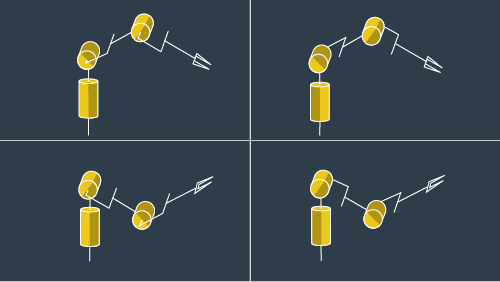

#### The much preferred solution to solving the IK method is a known as an "analytical" or “closed-form” solution. 

Closed-form solutions are specific algebraic equation(s) that do not require iteration to solve and have two main advantages: generally they are much faster to solve than numerical approaches and it is easier to develop rules for which of the possible solutions is the appropriate one. However, only certain types of manipulators are solvable in closed-form. The obvious question is, so what types of manipulators have a closed-form solution? 

Research has shown that if either of the following two conditions are satisfied, then the serial manipulator is solvable in closed-form.

1. Three neighboring joint axes intersect at a single point, or
2. Three neighboring joint axes are parallel (which is technically a special case of 1, since parallel lines intersect at infinity)

Fortunately, the majority of six DoF serial manipulators currently used in industry will satisfy one of the above conditions.

---
Often the last three joints in a manipulator are revolute joints that satisfy condition 1, such a design is called a spherical wrist and the common point of intersection is called the *wrist center*. 

The advantage of such a design is that it kinematically decouples the position and orientation of the end effector. 

Mathematically, this means that instead of solving twelve nonlinear equations simultaneously (one equation for each term in the first three rows of the overall homogeneous transform matrix), it is now possible to *independently solve two simpler problems*: first, the Cartesian coordinates of the wrist center, and then the composition of rotations to orient the end effector. 

Physically speaking, a six degree of freedom serial manipulator with a spherical wrist would use the first three joints to control the position of the wrist center while the last three joints would orient the end effector as needed.

---

We will now formalize the solution procedure for serial manipulators with a spherical wrist. Consider the six degree of freedom manipulator shown here with joints 4, 5, and 6 comprising the spherical wrist. 

The location of the **wrist center (WC)** and **end effector (EE)** relative to the base frame "0" is given by, ${^{0}r_{WC/0}}$ and ${^{0}r_{EE/0}}$, respectively. The location of the **EE** relative to the **WC** is given by, ${^{0}r_{EE/WC}}$. 

Note that all three vectors are expressed in terms of the *base frame* as is indicated by the leading superscript, **“0”**.

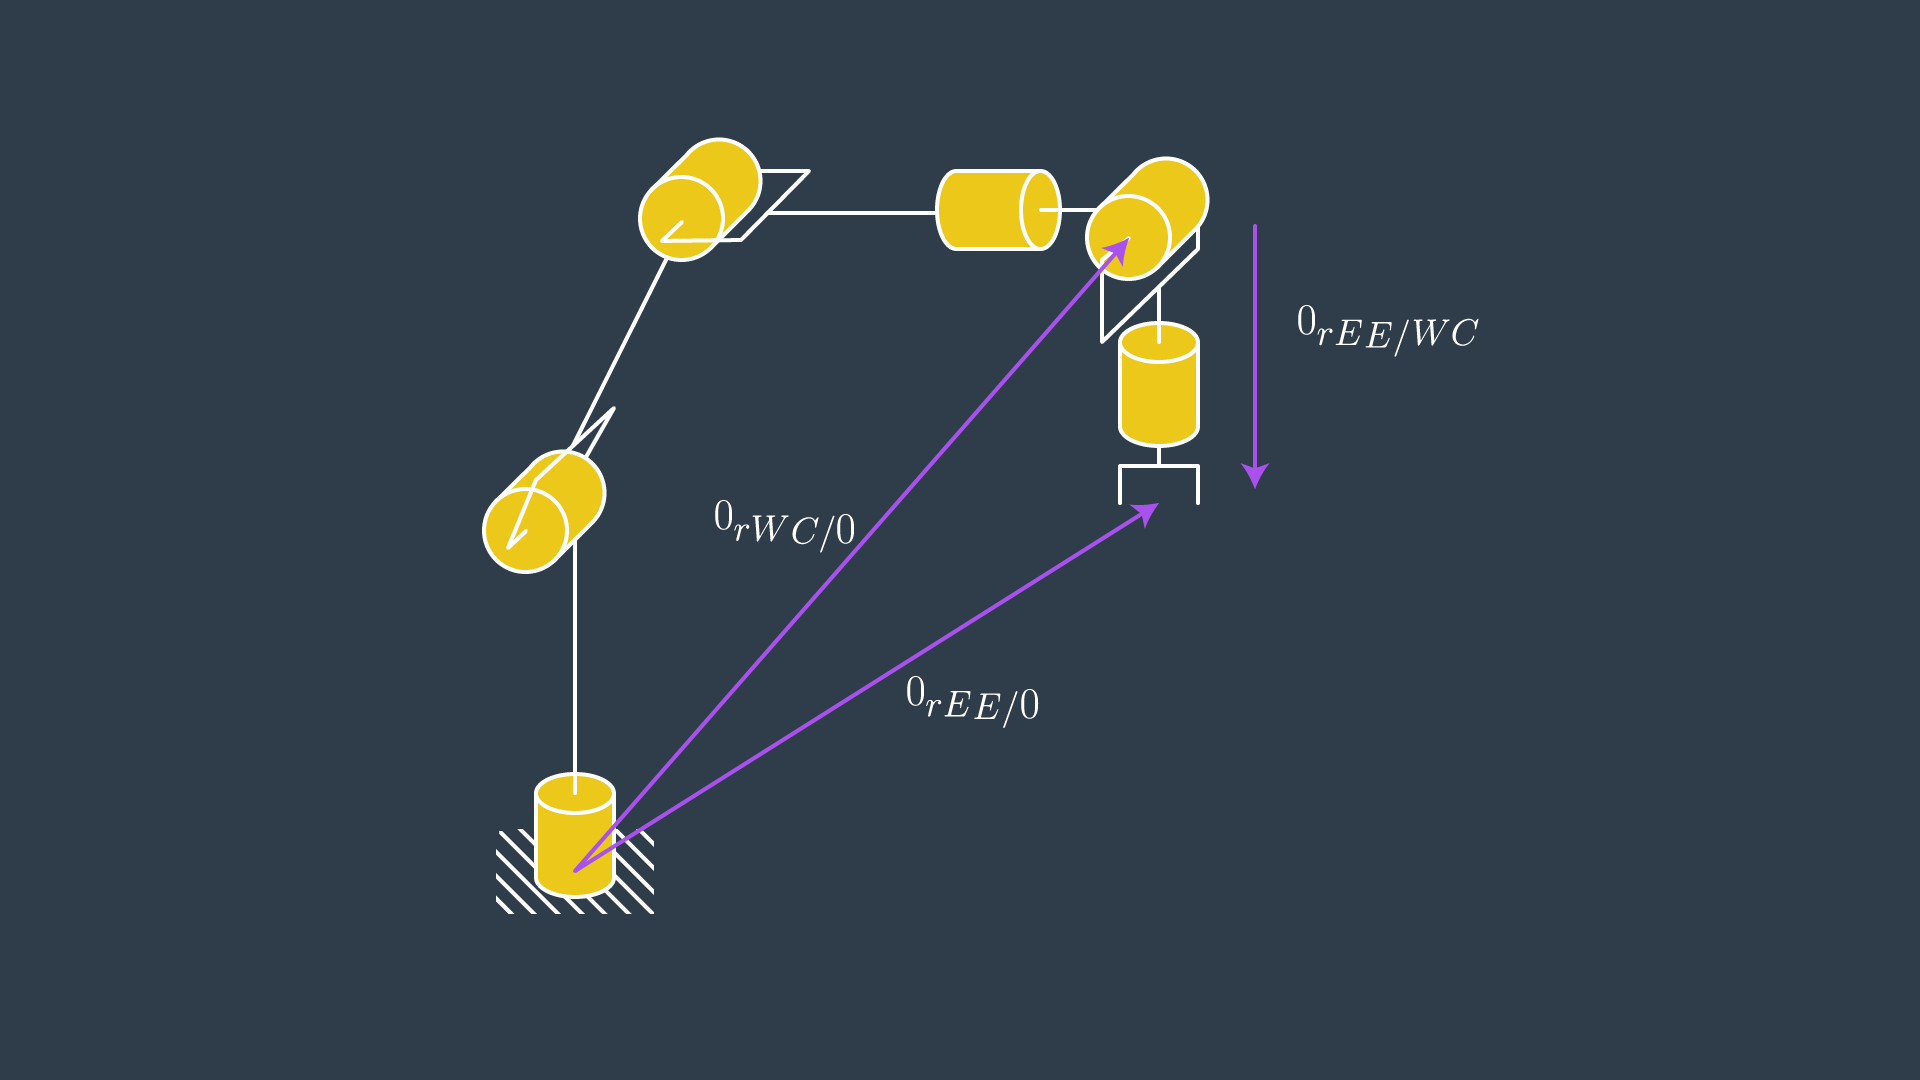

---
**Step 1**: is to complete the DH parameter table for the manipulator. Hint: **place the origin of frames 4, 5, and 6 coincident with the WC**.

**Step 2**: is to find the location of the WC relative to the base frame. Recall that the overall homogeneous transform between the base and end effector has the form,

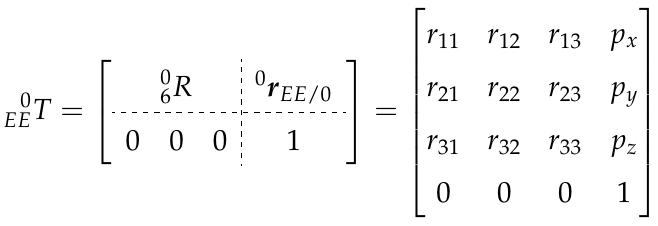

If, for example, you choose z4 parallel to z6 and pointing from the WC to the EE, then this displacement is a simple translation along z6. The magnitude of this displacement, let’s call it d, would depend on the dimensions of the manipulator and are defined in the URDF file. Further, since r13, r23, and r33 define the Z-axis of the EE relative to the base frame, the Cartesian coordinates of the WC is,

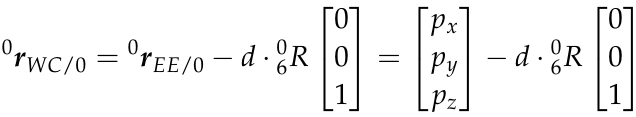


**Step 3**: find joint variables, q1, q2 and q3, such that the WC has coordinates equal to equation (3). This is the hard step. One way to attack the problem is by repeatedly projecting links onto planes and using trigonometry to solve for joint angles. Unfortunately, there is no generic recipe that works for all manipulators so you will have to experiment. The example in the next section will give you some useful guidance.

**Step 4**: once the first three joint variables are known, calculate ${^{3}_{0}R}$ via application of homogeneous transforms up to the WC.

**Step 5**: find a set of Euler angles corresponding to the rotation matrix,

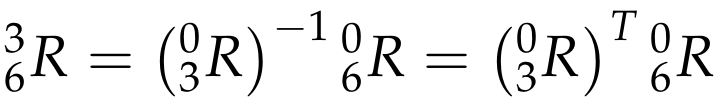

**Step 6**: choose the correct solution among the set of possible solutions

---

### Inverse Kinematics Example

To give you more insight into the solution process, particularly for the first three joint variables, we present an example of an RRP manipulator.

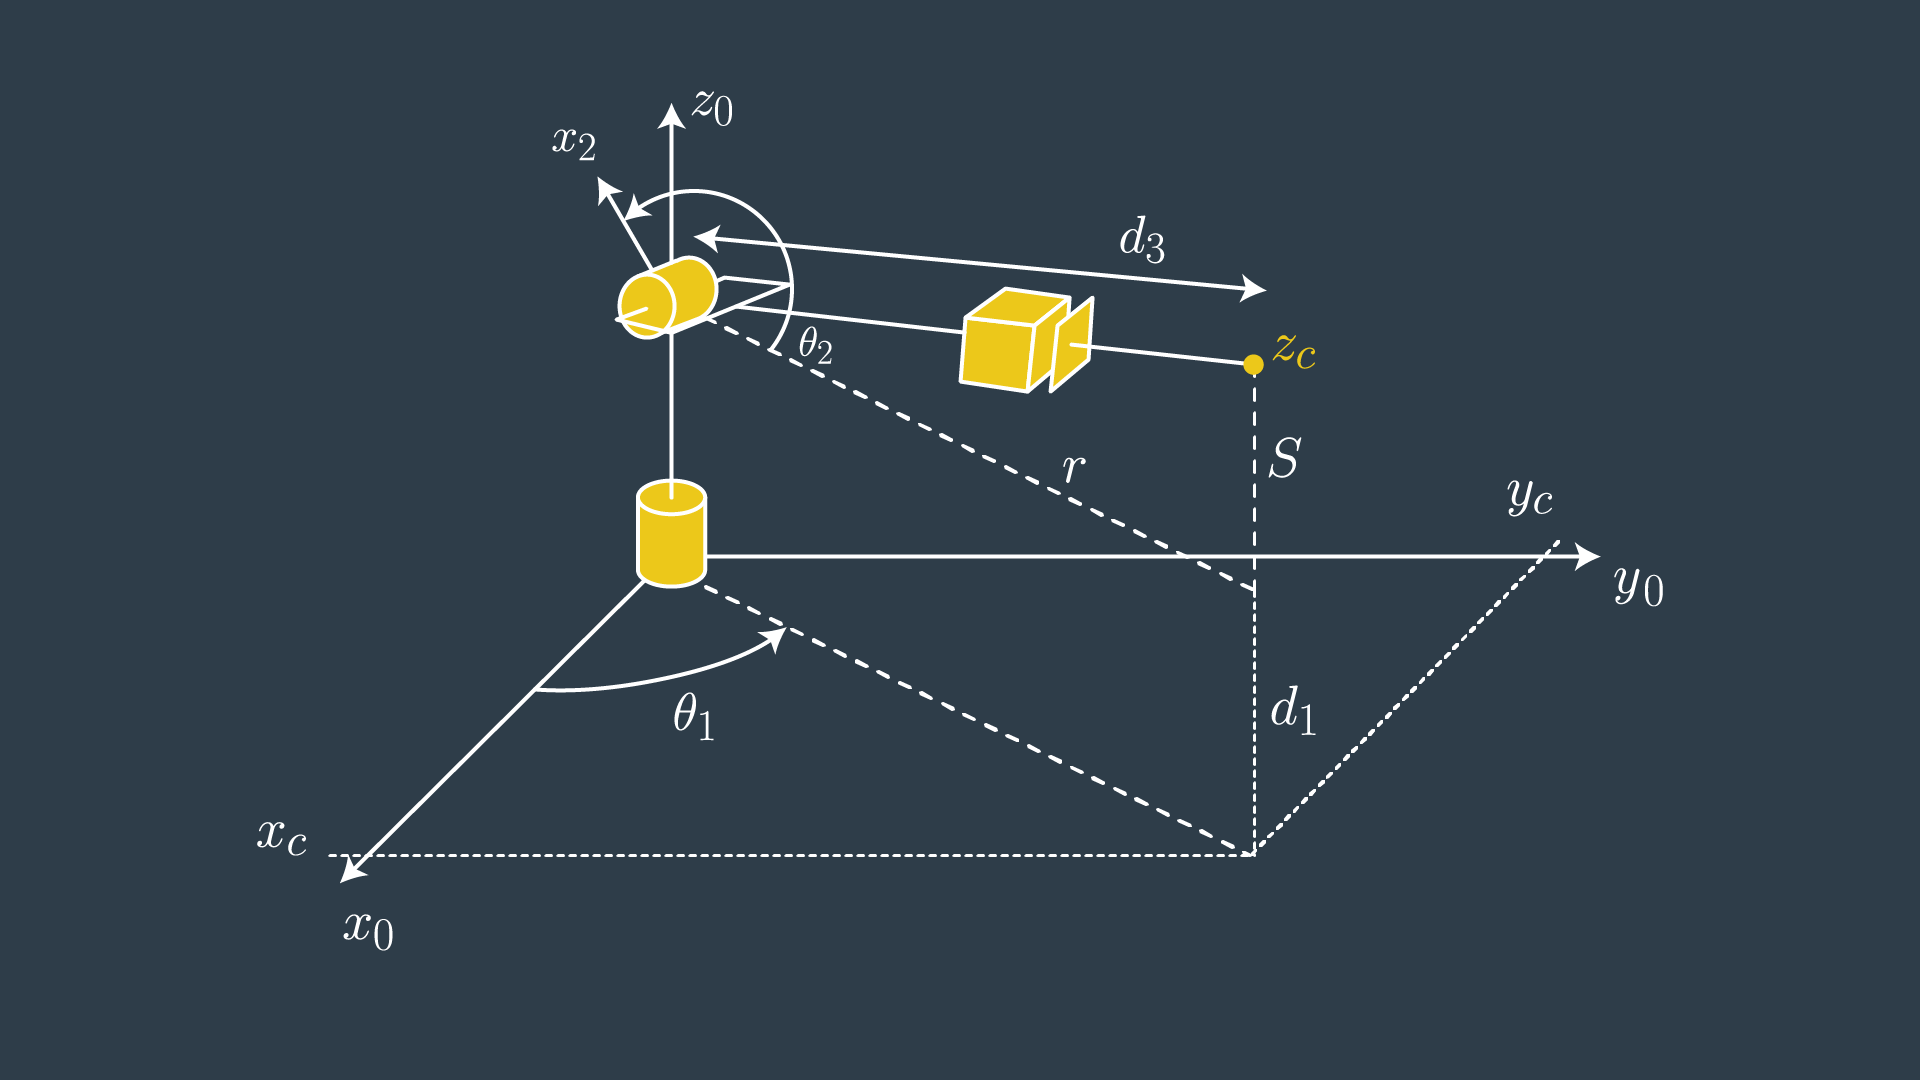

The point zc could be considered to be the wrist center of a spherical wrist. We will assume that the Cartesian coordinates of zc have already been calculated. To find 𝜃1, we need to project zc onto the ground plane - a trivial task since it only requires setting the z-coordinate = 0! Thus,

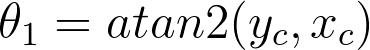

---
To solve for 𝜃2, imagine 𝜃1 = 0 and project links 2 and 3 onto the the x-z plane. Again, we use the atan2 function,

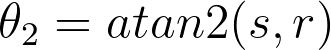

where,

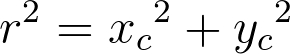

and,

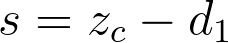



The final joint variable, d3, represents the length of the prismatic joint. From the figure, it is clear that d3 ,is the hypotenuse of a right triangle with sides “r” and “s”. Solving for d3,

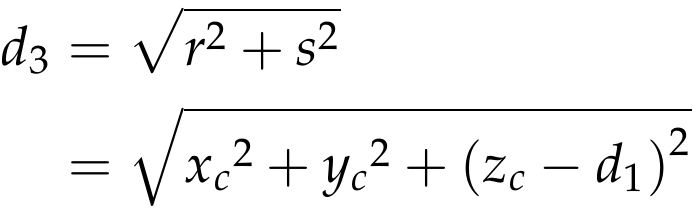

And that’s it! The first three joint variables are now described explicitly in closed-form.